In [4]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm import tqdm
import pandas as pd

In [2]:
path_dataset = '../../dataset/FIGURAS_ML_PUC_2019_Co/'
files = os.listdir(path_dataset)
files = files[:]

## Dataset Description

In [16]:
imgs = []
for filename in files:
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img = cv2.imread( path_dataset + filename )
        imgs.append(img.shape)

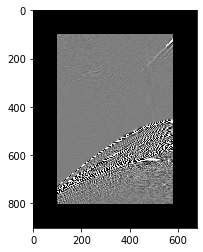

In [17]:
constant= cv2.copyMakeBorder(img,100,100,100,100,cv2.BORDER_CONSTANT)
plt.imshow(constant)

### Descrição do Tamanho de X

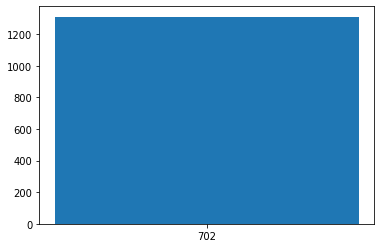

In [20]:
aux = [x[0] for x in imgs]
labels, counts = np.unique(aux, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

### Descrição do Tamanho de Y

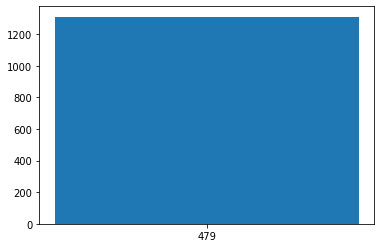

In [21]:
aux = [x[1] for x in imgs]
labels, counts = np.unique(aux, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

## Descrição dos Pixels

In [5]:
vdatas = pd.DataFrame()
for filename in tqdm(files):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img = cv2.imread( path_dataset + filename )
        # Convert to Pillow module
        image = Image.fromarray( img )

        # image to numpy array
        imdata = image.getdata( )
        vdata = np.array( imdata )
        # Corrigindo o tamanho para as novas imagens g2_...
        vdata = np.mean( vdata, axis = 1 )
        # Gerando a frequencia
        labels, counts = np.unique(vdata, return_counts=True)
        # Adicionando a um array
        df1 = pd.DataFrame(counts, index=labels)
        vdatas = vdatas.add(df1, fill_value=0)

100%|██████████| 5223/5223 [27:19<00:00,  3.42it/s]


In [14]:
vdatas

,0
0.000000,58899312.0
1.000000,512654.0
2.000000,520611.0
3.000000,527233.0
4.000000,535955.0
5.000000,542664.0
6.000000,552311.0
7.000000,560196.0
8.000000,568568.0
9.000000,578878.0


In [37]:
v = np.concatenate(vdatas)

In [33]:
labels = [int(x) for x in vdatas.index.values]
counts = [int(x) for x in vdatas.values]
print(len(labels), len(counts))

252 252


In [34]:
print(labels, counts)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 22

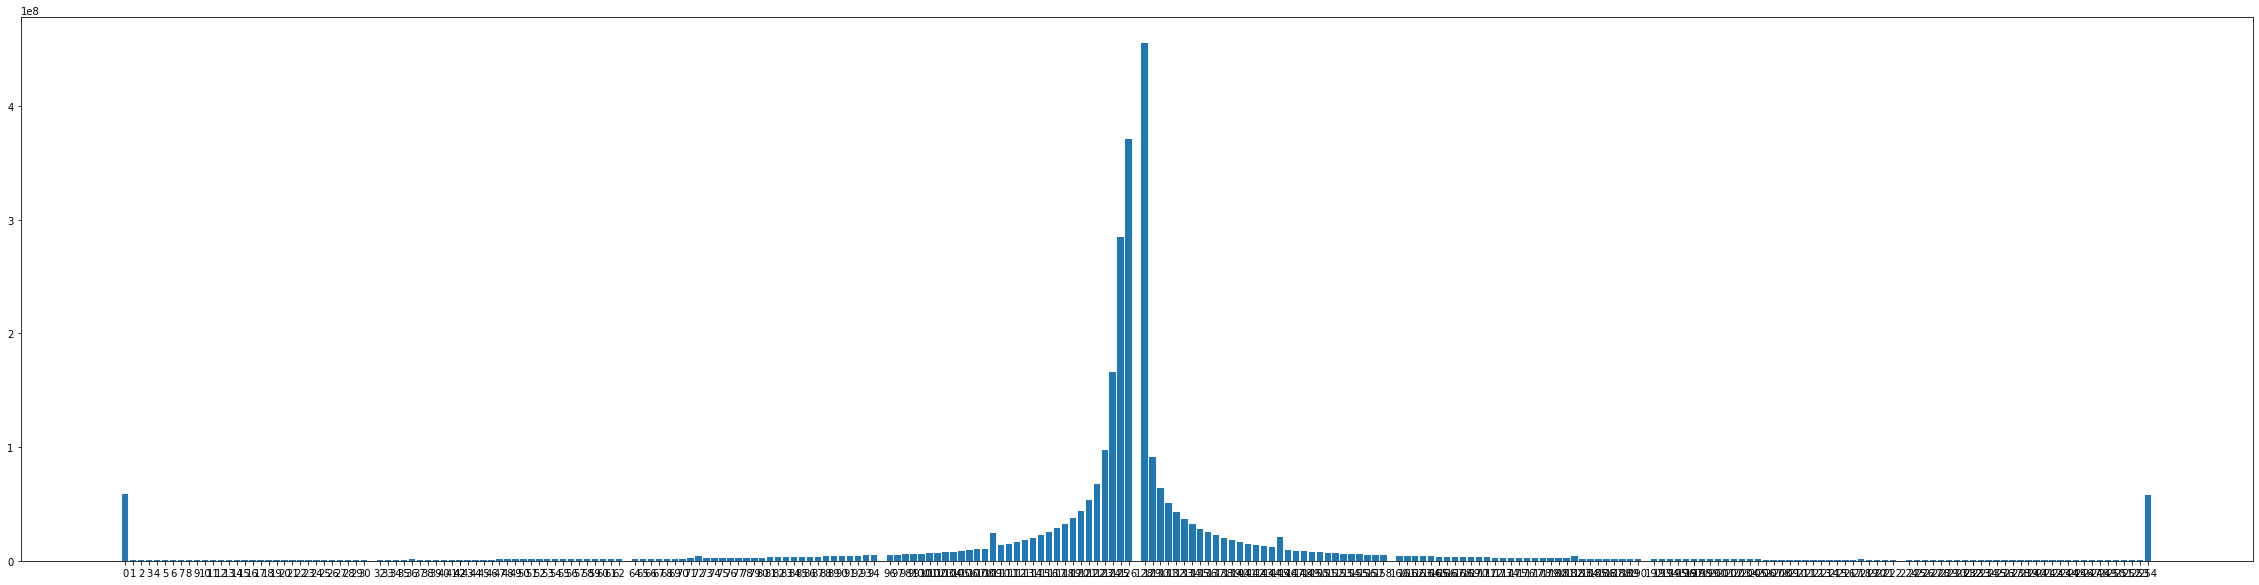

In [35]:
plt.figure(figsize=(40,10))
#counts = np.sum(v, axis=0)
#labels = [x for x in range(0,255)]
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [36]:
for index, label in enumerate(labels):
    if counts[index] == max(counts):
        print(label)

128


In [37]:
joint = [(-counts[i], l) for i, l in enumerate(labels)]
joint

[(-58899312, 0),
 (-512654, 1),
 (-520611, 2),
 (-527233, 3),
 (-535955, 4),
 (-542664, 5),
 (-552311, 6),
 (-560196, 7),
 (-568568, 8),
 (-578878, 9),
 (-586302, 10),
 (-596756, 11),
 (-605941, 12),
 (-615321, 13),
 (-625341, 14),
 (-635526, 15),
 (-645292, 16),
 (-657037, 17),
 (-666768, 18),
 (-677648, 19),
 (-688494, 20),
 (-700125, 21),
 (-713990, 22),
 (-726256, 23),
 (-739066, 24),
 (-750721, 25),
 (-764988, 26),
 (-777880, 27),
 (-792267, 28),
 (-805250, 29),
 (-820928, 30),
 (-835345, 32),
 (-851695, 33),
 (-870385, 34),
 (-883044, 35),
 (-1819501, 36),
 (-936491, 37),
 (-953934, 38),
 (-974277, 39),
 (-994736, 40),
 (-1012896, 41),
 (-1034940, 42),
 (-11303, 42),
 (-1056527, 43),
 (-1076311, 44),
 (-1100431, 45),
 (-1125552, 46),
 (-1149490, 47),
 (-1172662, 48),
 (-1200740, 49),
 (-1226439, 50),
 (-1256217, 51),
 (-1284051, 52),
 (-1312662, 53),
 (-1345005, 54),
 (-1375810, 55),
 (-1412733, 56),
 (-1444824, 57),
 (-1479156, 58),
 (-1517415, 59),
 (-1557077, 60),
 (-1597826, 

In [38]:
dtype = [('counts', int), ('label', float)]

In [39]:
a = np.array(joint, dtype=dtype)

In [40]:
k = np.sort(a, order='counts')

In [41]:
c = [-x[0] for x in k]
l = [x[1] for x in k]

In [42]:
p = 50
new_counts = c[:p] + [np.array(c[p:]).sum()]
new_labels = l[:p] + ['outros']

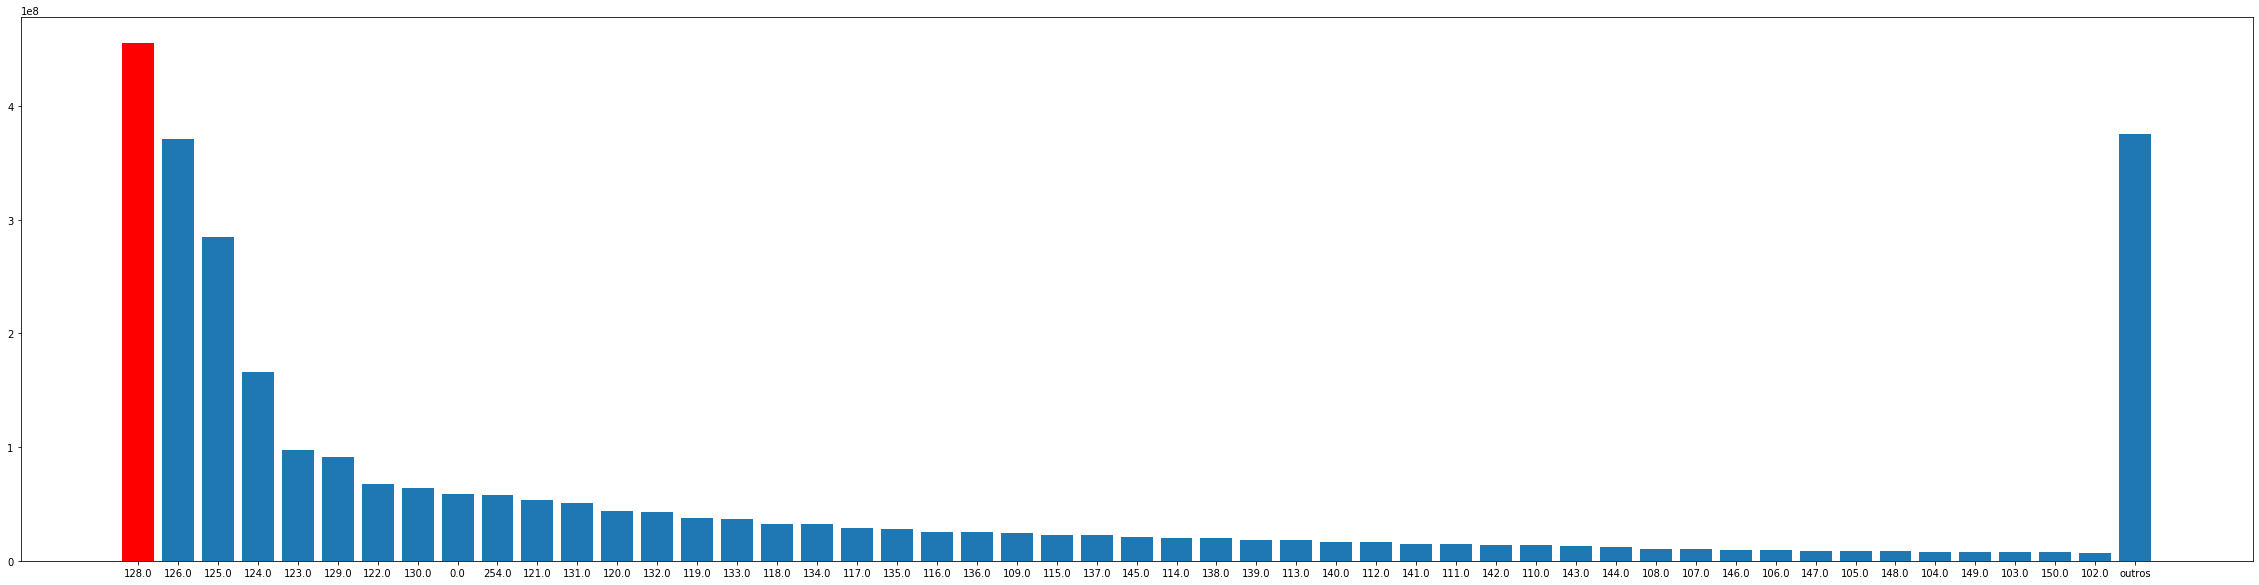

In [43]:
plt.figure(figsize=(40,10))
plt.bar(range(len(new_labels[:1])), list(map(float,new_counts[:1])), color= 'red' )
plt.bar(range(1,len(new_labels[:])), list(map(float,new_counts))[1:] )
plt.xticks(range(len(new_labels)), new_labels)
plt.show()